In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp "/content/drive/My Drive/BaseDeDatos/datos_completosRNN+H.csv" "/content/"

In [4]:
data = pd.read_csv("datos_completosRNN+H.csv")

In [5]:
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Establecer la columna de fecha como el índice
data.set_index('Fecha', inplace=True)

# Configurar una frecuencia diaria
data = data.asfreq('D')

In [6]:
df = data.copy()

In [7]:
df

,Humedad_Relativa_Minima,Humedad_Relativa_Media,Humedad_Relativa_Maxima,Direccion_de_Viento_Minima,Direccion_de_Viento_Maxima,Velocidad_de_Viento_Minima,Velocidad_de_Viento_Maxima,eTo,Temperatura_Maxima,Temperatura_Minima,Precipitacion
Fecha,,,,,,,,,,,
2000-01-01,42.0,58.0,87.0,0.000000,6.000000,0.000000,18.500000,5.750000,27.5,13.7,0.0
2000-01-02,28.0,45.0,67.0,0.000000,6.000000,0.000000,33.400000,6.500000,29.3,12.3,0.1
2000-01-03,41.0,52.0,60.0,0.000000,14.000000,0.000000,37.100000,5.590000,27.1,13.9,0.0
2000-01-04,36.0,51.0,67.0,0.000000,2.000000,0.000000,11.100000,6.220000,28.4,12.1,8.6
2000-01-05,40.0,58.0,89.0,0.000000,6.000000,0.000000,18.500000,5.510000,25.9,11.7,2.7
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,21.0,33.0,51.0,2.151906,8.187082,2.990964,15.378424,5.357401,31.8,13.0,0.0
2022-12-28,36.0,51.0,81.0,2.201653,8.187082,2.990967,15.378424,5.357401,27.1,12.2,6.5
2022-12-29,53.0,57.0,62.0,2.231884,8.187080,2.990971,15.378425,5.357400,27.3,17.0,0.0


In [8]:
TempMax = df[['Temperatura_Maxima']].copy()

In [9]:
TempMax

,Temperatura_Maxima
Fecha,
2000-01-01,27.5
2000-01-02,29.3
2000-01-03,27.1
2000-01-04,28.4
2000-01-05,25.9
...,...
2022-12-27,31.8
2022-12-28,27.1
2022-12-29,27.3


In [10]:
TempMax.isnull().sum()

Temperatura_Maxima    0
dtype: int64

<Axes: xlabel='Fecha'>

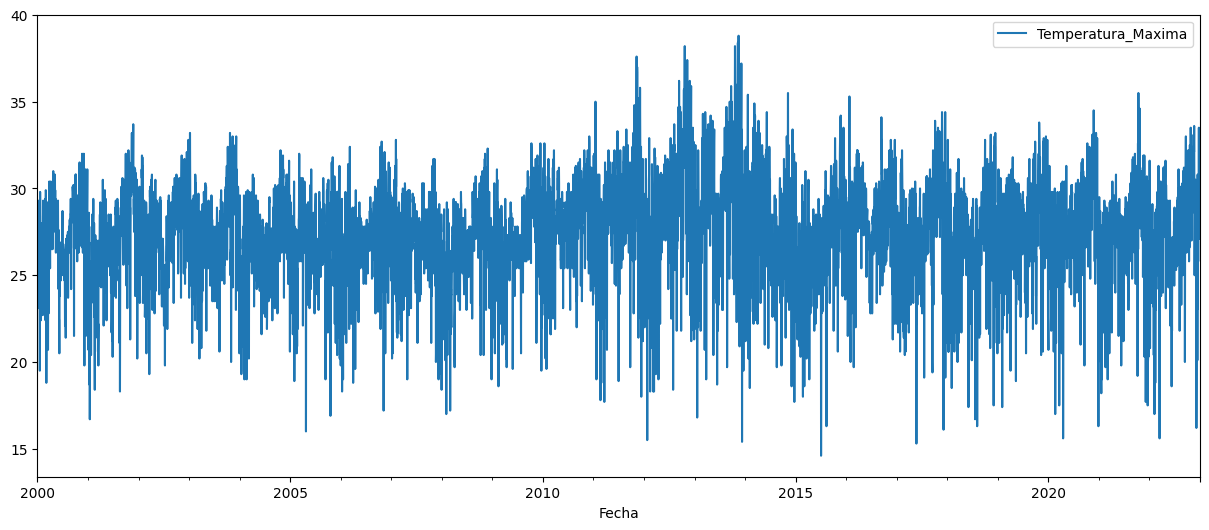

In [11]:
TempMax.plot(figsize=(15,6))

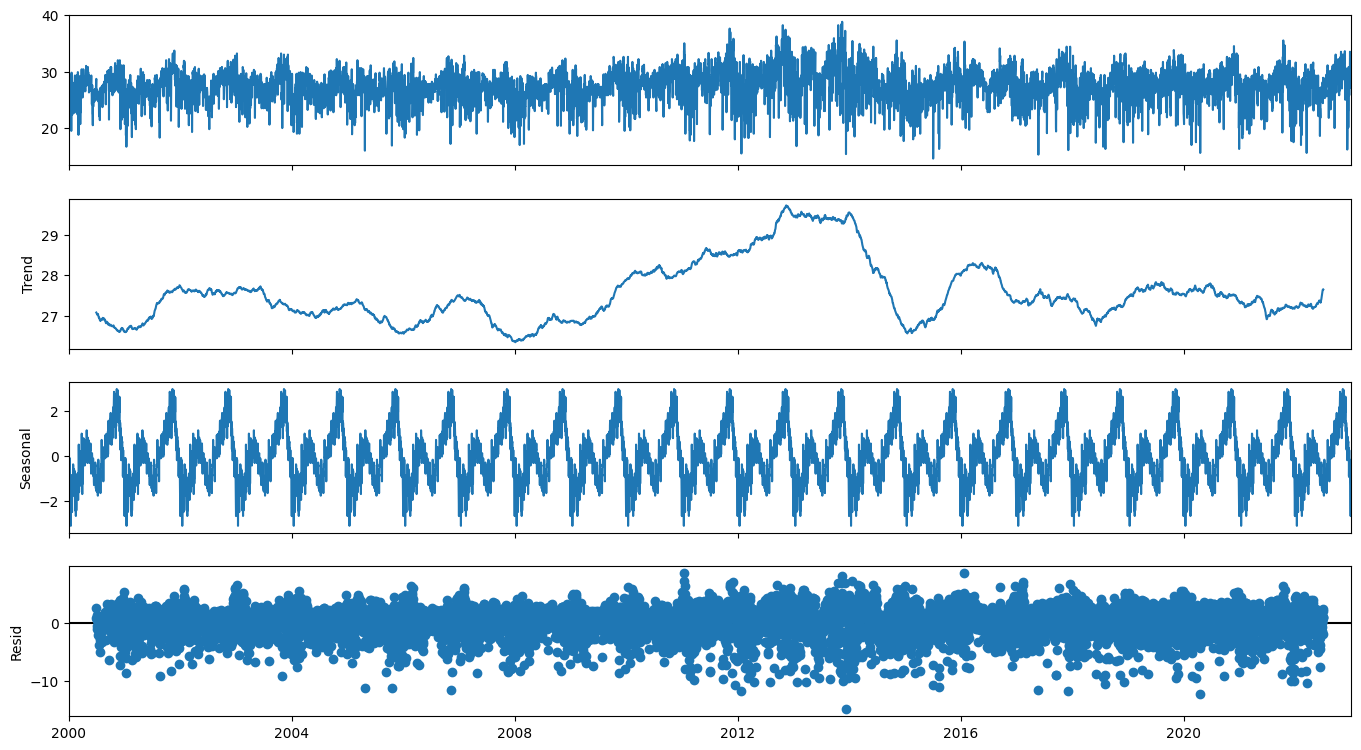

In [12]:
# Descomposición de la serie de tiempo

import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(TempMax,period=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [13]:
train = TempMax.iloc[:-365]

In [14]:
train

,Temperatura_Maxima
Fecha,
2000-01-01,27.5
2000-01-02,29.3
2000-01-03,27.1
2000-01-04,28.4
2000-01-05,25.9
...,...
2021-12-27,22.7
2021-12-28,23.8
2021-12-29,26.7


In [15]:
test = TempMax.iloc[-365:]

In [16]:
test

,Temperatura_Maxima
Fecha,
2022-01-01,30.4
2022-01-02,31.6
2022-01-03,28.8
2022-01-04,27.8
2022-01-05,20.8
...,...
2022-12-27,31.8
2022-12-28,27.1
2022-12-29,27.3


In [17]:
# Definir el modelo
model = ExponentialSmoothing(train, seasonal='additive', seasonal_periods=365).fit()

In [18]:
# Hacer predicciones
pred = model.predict(start=test.index[0], end=test.index[-1])


In [19]:
# Imprimir las predicciones
print(pred)

2022-01-01    25.692093
2022-01-02    27.041918
2022-01-03    26.369776
2022-01-04    27.022991
2022-01-05    26.421298
                ...    
2022-12-27    25.445359
2022-12-28    24.798570
2022-12-29    25.957578
2022-12-30    26.315294
2022-12-31    25.802401
Freq: D, Length: 365, dtype: float64


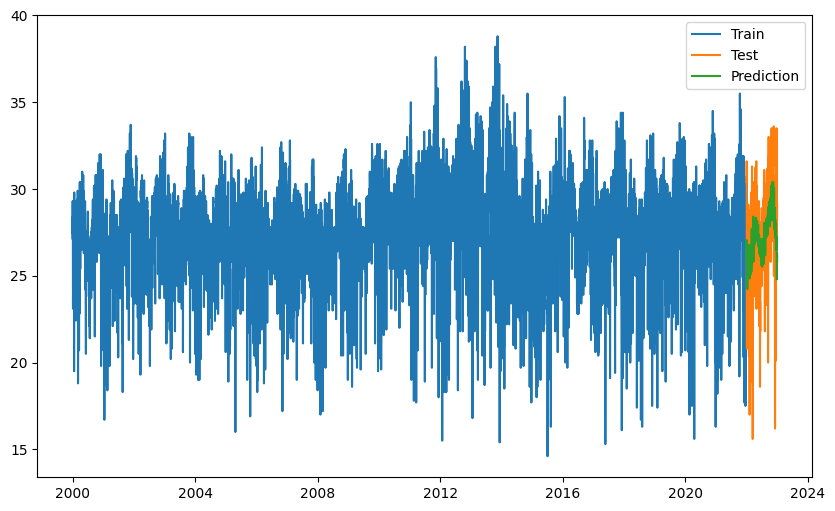

In [20]:
# Crear un gráfico de los datos de entrenamiento, prueba y predicciones
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Prediction')
plt.legend(loc='best')
plt.show()

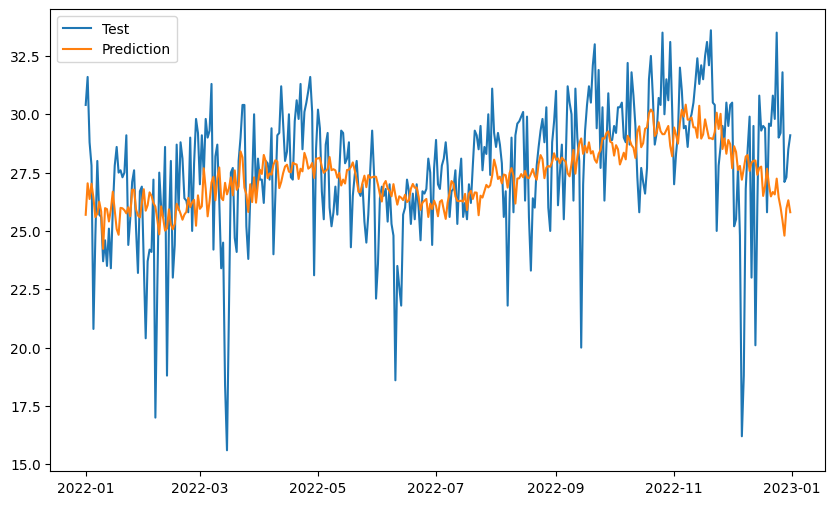

In [21]:
# Crear un gráfico de los datos de prueba y predicciones
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Prediction')
plt.legend(loc='best')
plt.show()

In [22]:
# Vemos algunos indicadores del ajuste!
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, pred)
rmse = np.sqrt(mse)
print(f'RMSE: ',rmse)

# Definimos y calculamos el MAPE (mean_absolute_percentage_error)
test, pred = np.array(test), np.array(pred)
print(f'MAPE: ',np.mean(np.abs((test - pred) / test)) * 100)

RMSE:  2.607046227344705
MAPE:  9.106485365369812


In [23]:
from scipy.stats import pearsonr

# Suponiendo que 'test' es una matriz bidimensional
test_array = test.flatten()

# 'pred' ya es un array unidimensional
pred_array = pred

# Calculamos la correlación de Pearson
corr, _ = pearsonr(test_array, pred_array)
print('Correlación de Pearson: %.3f' % corr)

Correlación de Pearson: 0.410


In [24]:
from scipy.spatial.distance import directed_hausdorff

# Asegúrate de que ambos arrays tengan la forma correcta para la función directed_hausdorff
# Convertirlos en arrays de dos dimensiones donde cada punto es un array con un elemento
u = np.atleast_2d(test_array).T
v = np.atleast_2d(pred_array).T

# Calcula la distancia dirigida de Hausdorff en ambos sentidos
forward = directed_hausdorff(u, v)[0]
backward = directed_hausdorff(v, u)[0]

# La distancia de Hausdorff es el máximo de estas dos distancias
distance = max(forward, backward)
print('La distancia Hausdorff es:', distance)

La distancia Hausdorff es: 8.63201024930787
